### 6-Analyte Classification on the preprocessed data using FDA
### Edgar Acuna
###  June 2021

In [270]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

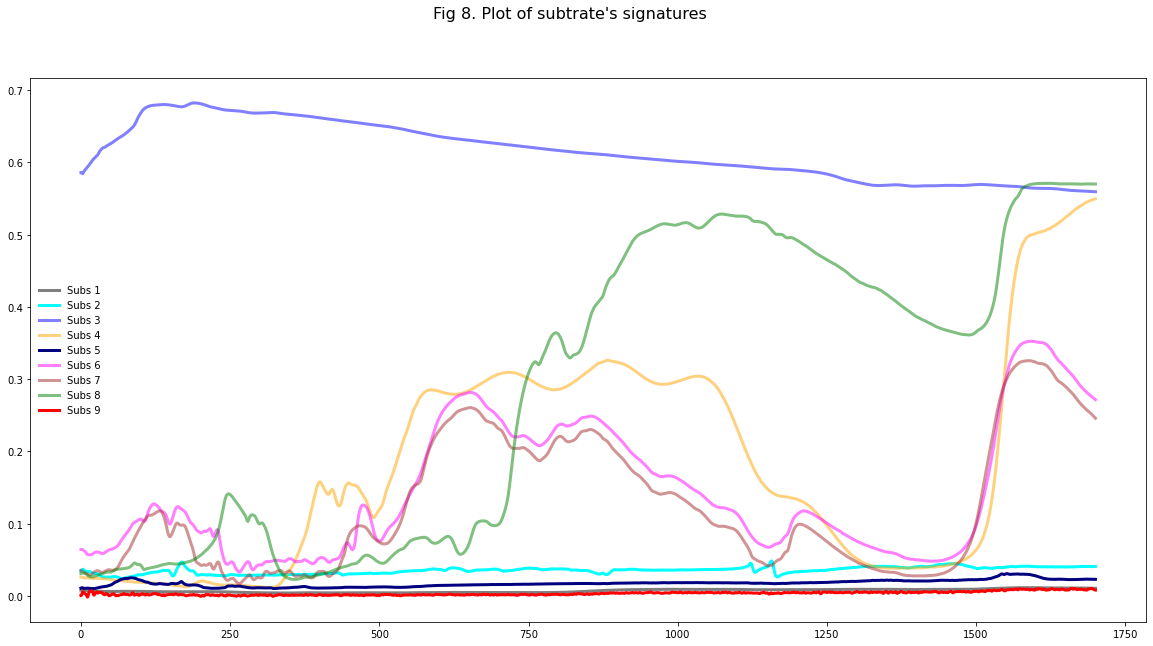

In [273]:
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(0,1701,1)
fig.suptitle("Fig 8. Plot of subtrate's signatures",fontsize=16)
ax.plot(x, subs.iloc[0,:], color='black',lw=3, alpha=0.5, label='Subs 1')
ax.plot(x,subs.iloc[1,:], color='cyan', lw=3, label='Subs 2')
ax.plot(x, subs.iloc[2,:], color='blue', lw=3, alpha=0.5, label='Subs 3')
ax.plot(x, subs.iloc[3,:], color='orange', lw=3, alpha=0.5, label='Subs 4')
ax.plot(x,subs.iloc[4,:], color='navy', lw=3, label='Subs 5')
ax.plot(x, subs.iloc[5,:], color='magenta',lw=3, alpha=0.5, label='Subs 6')
ax.plot(x, subs.iloc[6,:], color='brown', lw=3, alpha=0.5, label='Subs 7')
ax.plot(x, subs.iloc[7,:], color='green', lw=3, alpha=0.5, label='Subs 8')
ax.plot(x,subs.iloc[8,:], color='red', lw=3, label='Subs 9')
ax.legend(loc='best', frameon=False)

In [274]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [275]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [276]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

###  Centering

In [277]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [291]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


In [292]:
cent_subs['substrate']=ys

### Normalization

In [293]:
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


In [294]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.006593,0.007476,0.006800,0.010072,0.010446,0.010157,0.013928,0.014528,0.013623,0.017932,...,-0.005337,-0.007268,-0.006155,-0.012700,-0.008968,-0.002538,-0.003519,-0.004037,-0.008019,-0.006984
5,-0.016333,0.011538,0.001048,-0.000179,-0.000770,-0.001737,0.007633,0.009170,0.002870,0.011766,...,-0.012672,-0.005718,-0.015373,-0.005127,-0.011386,-0.009255,-0.001060,-0.001612,-0.016363,-0.002559
8,-0.005348,0.036134,0.030431,0.011412,0.007818,0.013162,-0.032478,0.008999,0.008123,0.009853,...,0.005515,-0.038647,-0.039608,-0.013988,0.020456,0.010057,0.000856,0.038902,0.035069,0.016243
28,0.004714,0.005182,0.005515,0.005790,0.006058,0.006349,0.006700,0.007108,0.007465,0.007738,...,-0.016436,-0.016340,-0.016247,-0.016168,-0.016075,-0.015967,-0.015840,-0.015707,-0.015558,-0.015445
46,-0.003245,0.000118,0.003326,0.006083,0.004984,0.005934,0.000673,0.003487,0.005428,0.005932,...,-0.013769,-0.019043,-0.015090,-0.016453,-0.014209,-0.016319,-0.013047,-0.016972,-0.014881,-0.016518


In [295]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
#print(y)

In [300]:
X=b1.iloc[:,0:1701]
arr = X.to_numpy()
arr1=arr.tolist()
grid=list(range(1701))
import skfda
fd = skfda.FDataGrid(
    data_matrix=arr1,grid_points=grid
)
print(type(fd)) 

<class 'skfda.representation.grid.FDataGrid'>


In [301]:
print(type(y))

<class 'numpy.ndarray'>


In [302]:
import skfda
from skfda.ml.classification import KNeighborsClassifier

from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedShuffleSplit)

import matplotlib.pyplot as plt
import numpy as np

In [303]:
X_train, X_test, y_train, y_test = train_test_split(fd, y, test_size=0.2, random_state=0)
print(type(X_train))
print(type(y_train))
y_test

<class 'skfda.representation.grid.FDataGrid'>
<class 'numpy.ndarray'>


array([19, 37, 18, ...,  4, 22, 32])

In [304]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(pred)

[19 37 18 ...  4 22 32]


In [305]:
sum(y_test!=pred)

72

In [307]:
pred.shape

(3600,)

In [308]:
72/3600

0.02